<a href="https://colab.research.google.com/github/vickyrana123/Gym-management-system/blob/main/Dragon_Real_Estates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dragon Real Estate- Price Predictor**

In [ ]:
import pandas as pd

In [ ]:
housing=pd.read_csv('housing.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [ ]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.288367,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.704890,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.211000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.629000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
import matplotlib.pyplot as plt


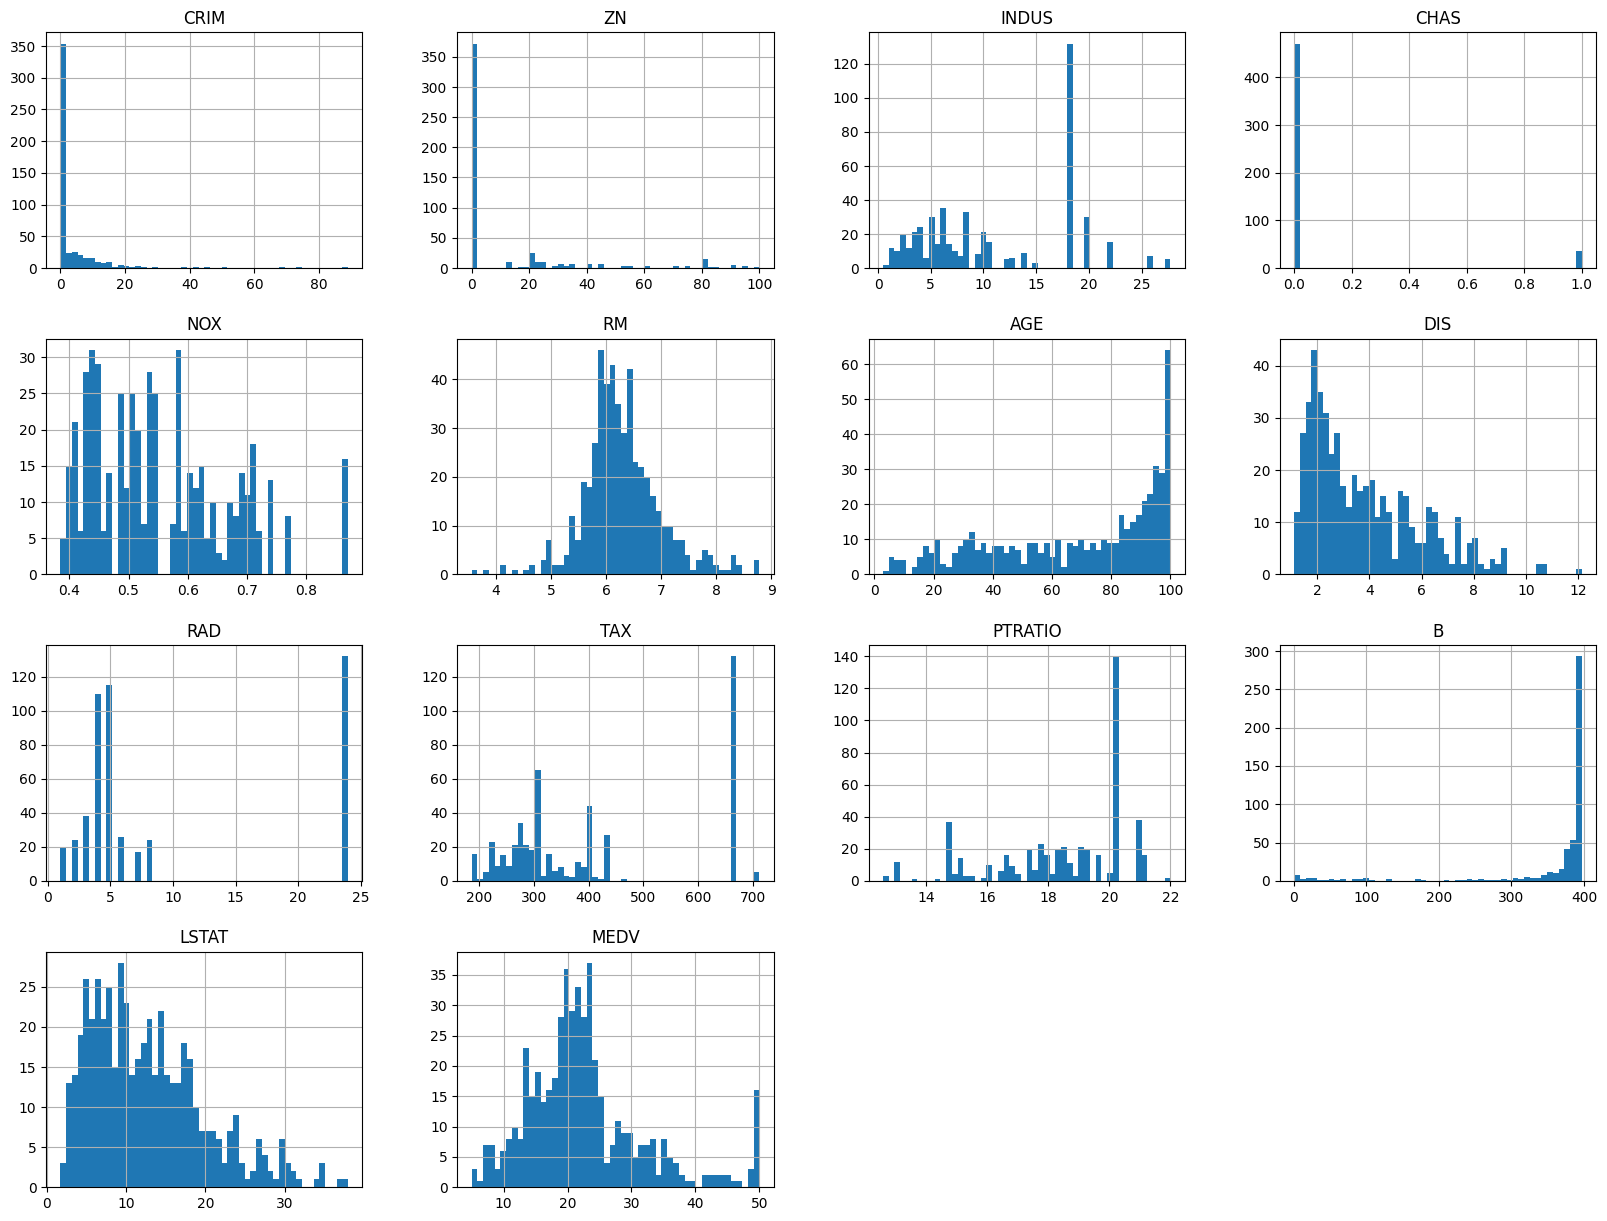

In [ ]:
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [ ]:
# import numpy as np
# def split_train_test(data,test_ratio):
#   np.random.seed(42)
#   shuffled=np.random.permutation(len(data))
#   test_set_size=int(len(data)*test_ratio)
#   test_indices=shuffled[:test_set_size]
#   train_indices=shuffled[test_set_size:]
#   return data.iloc[train_indices],data.iloc[test_indices]



**Train Test Spliting**


In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print("Rows in train set:",len(train_set))
print("Rows in test set:",len(test_set))

Rows in train set: 404
Rows in test set: 102


In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
  strat_train_set=housing.loc[train_index]
  strat_test_set=housing.loc[test_index]

In [ ]:
strat_test_set['CHAS'].value_counts()


0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [ ]:
376/28

13.428571428571429

In [ ]:
95/7

13.571428571428571

In [ ]:
housing=strat_train_set.copy()

**Correlation**

In [ ]:
from sqlalchemy import false
correlation=housing.corr()
correlation['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679072
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

<Axes: xlabel='MEDV', ylabel='RM'>

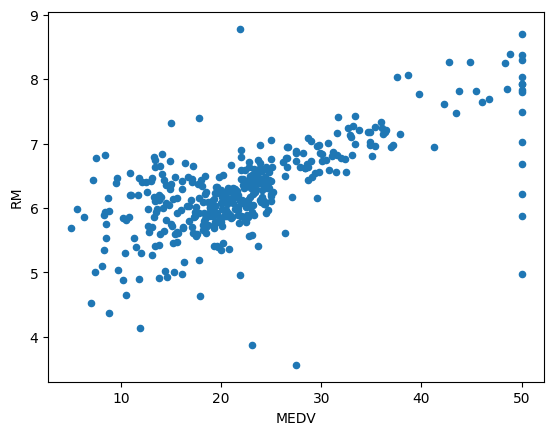

In [ ]:
housing.plot(kind='scatter' ,x='MEDV', y='RM')

**Attribute Combination**

In [ ]:
housing['TAXRM']=housing['TAX']/housing['RM']
correlation=housing.corr()
correlation['MEDV'].sort_values(ascending=False)


MEDV       1.000000
RM         0.679072
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.530401
LSTAT     -0.740494
Name: MEDV, dtype: float64

In [ ]:
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

**Missing Values**

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       399 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 44.2 KB


In [ ]:
#remove null values
housing.dropna(subset=['RM']).shape

(399, 13)

In [ ]:
#remove attribute
housing.drop('RM',axis=1).shape

(404, 12)

In [ ]:
#fill missing value with specific values
housing['RM'].fillna(housing['RM'].mean())
housing.shape

(404, 13)

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
imputer.fit(housing)

SimpleImputer()

In [ ]:
x=imputer.transform(housing)
housing_tr = pd.DataFrame(x, columns=housing.columns)
housing_tr.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284536,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711498,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.229000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


**SCikit learn design**

Primarily, three types of objects
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

2. Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

3. Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

**Feature Scaling**

Primarily, two types of feature scaling methods:
1. Min-max scaling (Normalization)
    (value - min)/(max - min)
    Sklearn provides a class called MinMaxScaler for this
    
2. Standardization
    (value - mean)/std
    Sklearn provides a class called StandardScaler for this



**Creating Pipline**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="mean")),
    #     ..... add as many as you want in your pipeline
    ('std_scaler', StandardScaler()),
])

In [ ]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr.shape

(404, 13)

**Selecting desired model**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# model=LinearRegression()
# model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [ ]:
some_data=housing.iloc[:5]
some_labels=housing_labels[:5]
prepared_data=my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.143, 25.579, 16.582, 23.397, 23.606])

In [ ]:
some_labels

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

**Evaluating Models**

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

housing_prediction=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_prediction)
rmse=np.sqrt(mse)

In [ ]:
rmse

1.1821331982965584

**Using better evaluation technique**

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring='neg_mean_squared_error',cv=10)
rmse_score=np.sqrt(-scores)
rmse_score

array([2.72065329, 2.77956793, 4.28336149, 2.52296824, 3.43059314,
       2.69097078, 5.12236967, 3.40350264, 3.01120578, 3.14597896])

In [ ]:
def print_scores(scores):
    print("Scores:", scores)
    print("Mean: ", scores.mean())
    print("Standard deviation: ", scores.std())

print_scores(rmse_score)

Scores: [2.72065329 2.77956793 4.28336149 2.52296824 3.43059314 2.69097078
 5.12236967 3.40350264 3.01120578 3.14597896]
Mean:  3.3111171932956567
Standard deviation:  0.7747821746242944


In [ ]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

**Testing the model**

In [ ]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

2.90112018088213

In [ ]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24842701, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

In [ ]:
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')
features = np.array([[-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24727277, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034]])
model.predict(features)

array([22.143])